In [1]:
import numpy as np
import astropy.units as u
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.io import fits
import matplotlib as mpl
import matplotlib.pyplot as plt

from deproject import deproject, get_galaxy_specs
from astropy.utils.data import get_pkg_data_filename
from reproject import reproject_interp

In [2]:
# galaxy = 'NGC0628'
galaxy = 'NGC1566'
RA, DEC, POSANG, INCL, DIST = get_galaxy_specs(galaxy) # DIST [Mpc]

Set DATE-AVG to '2022-11-22T14:25:43.879' from MJD-AVG.
Set DATE-END to '2022-11-22T15:25:15.123' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    19.657299 from OBSGEO-[XYZ].
Set OBSGEO-H to 1564986906.933 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


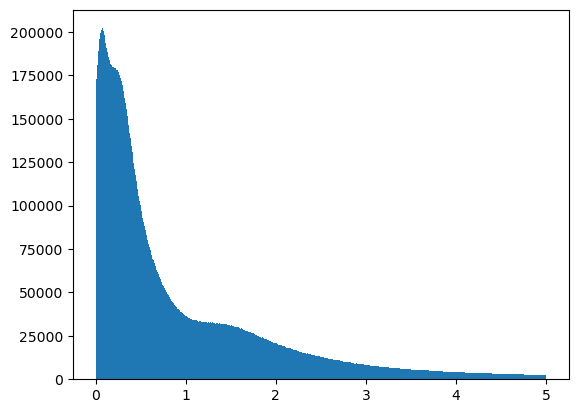

In [11]:
# hdu_galx = fits.open('/Users/Brandon Lam/galaxies/ngc0628/'+galaxy.lower()+'_w1_mjysr.fits')[0]
# hdu_galx = fits.open('/Users/Brandon Lam/galaxies/ngc0628/'+galaxy.lower()+'_irac1_gauss3.fits')[0]

# hdu_galx = fits.open('/Users/Brandon Lam/galaxies/ngc1566/'+galaxy.lower()+'_w1_mjysr.fits')[0]
# hdu_galx = fits.open('/Users/Brandon Lam/galaxies/ngc1566/'+galaxy.lower()+'_irac1_gauss3.fits')[0]

# hdu_galx = fits.open('C:/Users/Brandon Lam/Galaxies/' + galaxy.lower() + '/hlsp_phangs-jwst_jwst_nircam_ngc0628_f200w_v1p1_img.fits')[1]
hdu_galx = fits.open('C:/Users/Brandon Lam/Galaxies/' + galaxy.lower() + '/hlsp_phangs-jwst_jwst_nircam_ngc1566_f200w_v1p1_img.fits')[1]
mask = hdu_galx.data == 0
hdu_galx.data[mask] = np.nan
wcs_galx = WCS(hdu_galx.header)
wcs_galx.sip = None

deproj_img = deproject(center_coord=(RA*u.deg, DEC*u.deg), incl=INCL*u.deg, pa=POSANG*u.deg,
                           header=hdu_galx.header, wcs=None, naxis=None, ra=None, dec=None,
                           return_offset=False)
r_deg = deproj_img[0]
r_pc = r_deg * (np.pi / 180) * (DIST * 1e6) # in pc
# data = hdu_galx.data.flatten() * np.cos(INCL*np.pi/180)
# radii = r_pc.flatten()

# image_data = fits.getdata('C:/Users/Brandon Lam/Galaxies/' + galaxy.lower() + '/hlsp_phangs-jwst_jwst_nircam_ngc0628_f200w_v1p1_img.fits')
image_data = fits.getdata('C:/Users/Brandon Lam/Galaxies/' + galaxy.lower() + '/hlsp_phangs-jwst_jwst_nircam_ngc1566_f200w_v1p1_img.fits')
mask = image_data == 0
image_data[mask] = np.nan
bins0628w4 = np.linspace(0, 5,1000)
histogram = plt.hist(image_data.flatten(), bins=bins0628w4)

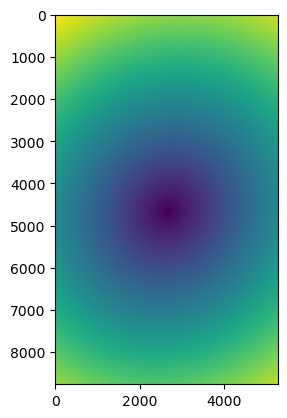

In [12]:
plt.imshow(r_pc)

## Incorporate the code provided to do the following:
### 1. Remake the figure above (radial distance in pc) using the WCS from the galaxy file header, similar and add axis labels and a color bar for radial distance (refer to `Fits_Image_Imshow.ipynb` for making images)
### 2. Make a mask (using logic statements and array slicing) in radius: Only display parts of the image where $R>5 kpc$.
### 3. Make a mask in intensity: Only display parts of the image where $I<1 MJy/sr$.

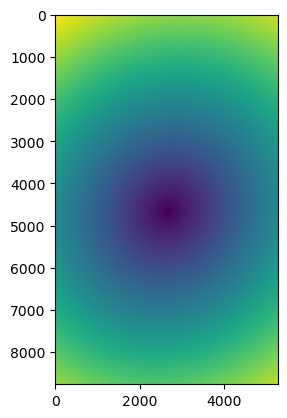

In [13]:
# mask = (r_pc > 5*1e3)
mask = (r_pc < 50*1e3)
masked = r_pc
masked[~mask] = np.nan
plt.imshow(masked)
dir = '/Users/Brandon Lam/galaxies/'
plt.savefig(dir + '/figs/' + '.png')

In [ ]:
image = fits.getdata(dir+'/ngc0628/'+galaxy.lower()+'_w1_mjysr.fits')
# image = fits.getdata(dir+'/ngc0628/'+galaxy.lower()+'_irac1_gauss3.fits')
# image = fits.getdata(dir+'/ngc1566/'+galaxy.lower()+'_w1_mjysr.fits')
# image = fits.getdata(dir+'/ngc1566/'+galaxy.lower()+'_irac1_gauss3.fits')

#for i in mask:
#    if (mask[i] == 0):
#        image[i] = np.nan
plt.imshow(image, vmin=-0.01*np.nanmin(image), vmax=0.001*np.nanmax(image))
plt.imshow(r_pc)

In [ ]:
# start a figure
f = plt.figure(figsize=(8, 8))
# set up a subplot with coordinate information from fits file header
ax = plt.subplot()
wcs_im1 = WCS(hdu_galx.header)

# mask
mask = r_pc < 23 * 1e3
galx = hdu_galx.data
ax=plt.subplot(projection=wcs_im1)
galx[mask] = np.nan

# display fits image
im = ax.imshow(hdu_galx.data, origin='lower', norm=mpl.colors.Normalize(vmin=-0.03652506055705085, vmax=0.03652506055705085), aspect='equal', cmap='inferno', alpha=1)

# everything that comes after this point is to make the figure look prettier; 
# strictly speaking, these aren't necessary
plt.rcParams["font.family"] = "serif"
mpl.rcParams['text.usetex'] = False

f.set_dpi(150)
f.set_facecolor('w')
ax.set_facecolor('k')
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax.text(0.05, 0.95, 'NGC0628', transform=ax.transAxes, fontsize=17,
                verticalalignment='top', bbox=props, zorder=11)
ax.set_xlabel('RA [J2000]', fontsize=18)
ax.set_ylabel('DEC [J2000]', fontsize=18)
ax.tick_params(axis='both', which='major', direction='in', color='white', length=20, width=2, labelsize=15)

# set up colorbar
cmap = mpl.cm.inferno
normalize = mpl.colors.LogNorm(vmin=1e-1, vmax=1e2)
cbar = f.colorbar(im, ax=ax)
cbar.set_label('Intensity at $8 \mu$m [MJy/sr]', rotation=270, fontsize=18, labelpad=20)
cbar.ax.tick_params(direction='in', which='both', labelsize=15)
cbar.ax.tick_params(which='major', length=15, width=2)
cbar.ax.tick_params(which='minor', length=5, width=1)
plt.setp(cbar.ax.spines.values(), linewidth=2)

f.tight_layout()

In [5]:
# hdu1 = fits.open('C:/Users/Brandon Lam/Galaxies/' + galaxy.lower() + '/hlsp_phangs-jwst_jwst_nircam_ngc0628_f200w_v1p1_img.fits')[1]
hdu1 = fits.open('C:/Users/Brandon Lam/Galaxies/' + galaxy.lower() + '/hlsp_phangs-jwst_jwst_nircam_ngc1566_f200w_v1p1_img.fits')[1]
# hdu2 = fits.open(get_pkg_data_filename('/Users/Brandon Lam/galaxies/ngc0628/'+galaxy.lower()+'_irac1_gauss3.fits'))[0]
# hdu2 = fits.open(get_pkg_data_filename('/Users/Brandon Lam/galaxies/ngc0628/'+galaxy.lower()+'_w1_mjysr.fits'))[0]
# hdu2 = fits.open(get_pkg_data_filename('/Users/Brandon Lam/galaxies/ngc1566/'+galaxy.lower()+'_irac1_gauss3.fits'))[0]
hdu2 = fits.open(get_pkg_data_filename('/Users/Brandon Lam/galaxies/ngc1566/'+galaxy.lower()+'_w1_mjysr.fits'))[0]

Set DATE-AVG to '2022-11-22T14:25:43.879' from MJD-AVG.
Set DATE-END to '2022-11-22T15:25:15.123' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    19.657299 from OBSGEO-[XYZ].
Set OBSGEO-H to 1564986906.933 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Text(0.5, 1.0, 'w1')

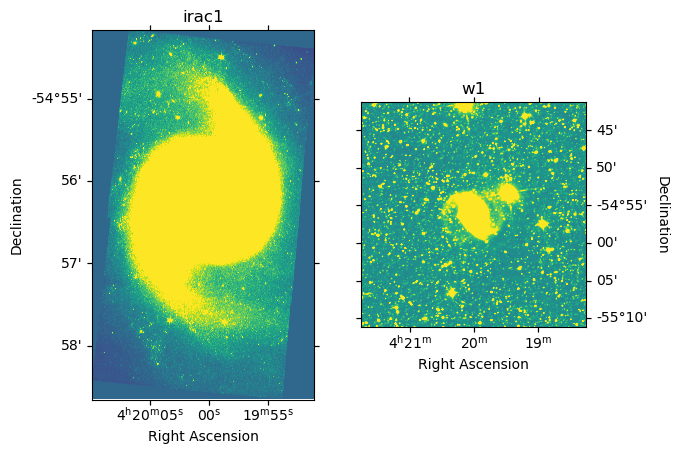

In [6]:
ax1 = plt.subplot(1,2,1, projection=WCS(hdu1.header))
ax1.imshow(hdu1.data, origin='lower', vmin=-0.5, vmax=1)
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
ax1.set_title('irac1')

ax2 = plt.subplot(1,2,2, projection=WCS(hdu2.header))
ax2.imshow(hdu2.data, origin='lower', vmin=-0.03652506055705085, vmax=0.03652506055705085)
ax2.coords['ra'].set_axislabel('Right Ascension')
ax2.coords['dec'].set_axislabel('Declination')
ax2.coords['dec'].set_axislabel_position('r')
ax2.coords['dec'].set_ticklabel_position('r')
ax2.set_title('w1')

Set DATE-AVG to '2022-11-22T14:25:43.879' from MJD-AVG.
Set DATE-END to '2022-11-22T15:25:15.123' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    19.657299 from OBSGEO-[XYZ].
Set OBSGEO-H to 1564986906.933 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Text(0.5, 1.0, 'w1 footprint')

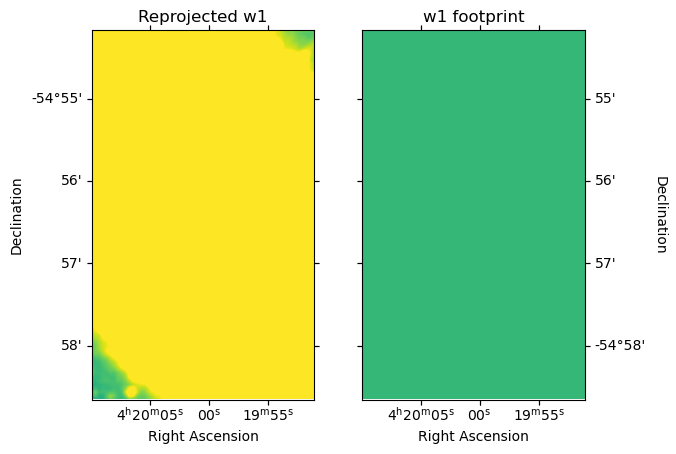

In [7]:
array, footprint = reproject_interp(hdu2, hdu1.header)
ax1 = plt.subplot(1,2,1, projection=WCS(hdu1.header))
ax1.imshow(array, origin='lower', vmin=-0.03652506055705085, vmax=0.03652506055705085)
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
ax1.set_title('Reprojected w1')

ax2 = plt.subplot(1,2,2, projection=WCS(hdu1.header))
ax2.imshow(footprint, origin='lower', vmin=0, vmax=1.5)
ax2.coords['ra'].set_axislabel('Right Ascension')
ax2.coords['dec'].set_axislabel('Declination')
ax2.coords['dec'].set_axislabel_position('r')
ax2.coords['dec'].set_ticklabel_position('r')
ax2.set_title('w1 footprint')

In [8]:
fits.writeto('w1_on_irac_header.fits', array, hdu1.header, overwrite=True)

In [9]:
hdu3 = fits.open(get_pkg_data_filename('w1_on_irac_header.fits'))[0]

Set DATE-AVG to '2022-11-22T14:25:43.879' from MJD-AVG.
Set DATE-END to '2022-11-22T15:25:15.123' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    19.657299 from OBSGEO-[XYZ].
Set OBSGEO-H to 1564986906.933 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


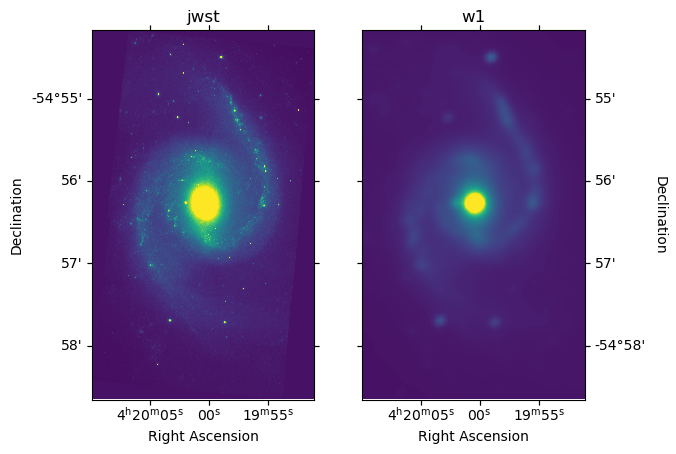

In [14]:
ax1 = plt.subplot(1,2,1, projection=WCS(hdu1.header))
ax1.imshow(hdu1.data, origin='lower', vmin=-0.5, vmax=10)
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
ax1.set_title('jwst')

ax2 = plt.subplot(1,2,2, projection=WCS(hdu3.header))
ax2.imshow(hdu3.data, origin='lower', vmin=-0.5, vmax=10)
ax2.coords['ra'].set_axislabel('Right Ascension')
ax2.coords['dec'].set_axislabel('Declination')
ax2.coords['dec'].set_axislabel_position('r')
ax2.coords['dec'].set_ticklabel_position('r')
ax2.set_title('w1')
plt.savefig(dir + '/figs/comparison.png')   